# SIMULTANEOUS IMAGE ANALYSIS OF IMAGE #1 + #2 

Libary: OpenCV <br>
(OPTION1) Find root tips from image #1, combine two images and find tips from the combined image. <br>
Compare tips between images and find same roots by checking contour's circle radius and calculating distance between contour's circle centres<br>
Root growing speed would be the difference between diameter of image #1 and combined image. <br>
(OPTION 2) Open csv-file with root tip information and compare data with image #2 tips. 

In [222]:
from matplotlib import pyplot as plt
import numpy as np
import cv2
from ipywidgets import *
from IPython.display import clear_output, display
import math

In [223]:
# import DETECT_ROOT funcitons 

from root_functions import scale_crop_gray, edge_areas_mask, change_areas_mask, light_areas_mask_color, remove_isolated_pixels
from root_functions import add_text, grab_contours, sort_contours

In [224]:
from ipywidgets import *
from tkinter import Tk, filedialog
%gui tk

In [225]:
def open_file():
    # Create Tk root
    root = Tk()
    # Hide the main window
    root.withdraw()
    root.call('wm', 'attributes', '.', '-topmost', True)

    infiles = filedialog.askopenfilename(multiple=True)
    return infiles


### Find contours

Find countours and collect contour coordinates to a dictionary for further dataframe generation <br>
If radius value is zero or less than 5, root is not taken

In [226]:
# find contours

def find_contours(filename, image, mask):
    # find the contours in the mask, then sort them from left to right
    cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = grab_contours(cnts)
    
    # Sort contours from left to right
    cnts = sort_contours(cnts)[0]
    print(f'Tips(TOTAL): {len(cnts)}')

    # loop over the contours and collect coordinates to the dictionary
    coordinates = {}
    imageID = 0
    for c in cnts:
    # get the bright spot of the image
        (x, y, w, h) = cv2.boundingRect(c)
        ((cX, cY), radius) = cv2.minEnclosingCircle(c)
        if int(radius) <= 10:
            pass
        else:
            # coordinates[i] = [filename.split("_")[3], filename, (int(cX), int(cY)), int(radius), 'Y']
            coordinates[imageID] = [filename[0].split('/')[-1], (int(cX), int(cY)), int(radius), int(radius)*2]
            imageID += 1
    print(f'Tips(RADIUS BIGGER THAN 10mm): {len(coordinates)}')
    return coordinates

In [227]:
# draw circle around roots and mark center of the circle

def draw_circles_around(image, coordinates, color):
    for i, v in coordinates.items():
        cv2.circle(image, (int(v[1][0]), int(v[1][1])), v[2], color, 1)
        cv2.circle(image, (int(v[1][0]), int(v[1][1])), 0, color, 1)

In [228]:
# add text --> root ID

def add_Text(image, coordinates):
    i = 0
    for k, v in coordinates.items():
        i += 1
        cv2.putText(image, "#{}".format(i), (int(v[1][0]+5), int(v[1][1]) - 5), cv2.FONT_HERSHEY_SIMPLEX, fontScale=0.5, color=(255, 255, 255), thickness=1)

### Read image #1 and #2 and merge them (OPTION 1)

Read images, create the combined image, find root tips from image #1 and combined image. Compare tips, find same, calculate tip's radius in both images, calculate difference -->  growing speed. 


In [229]:
# read ML images and original images

filename1 = open_file()
filename2 = open_file()
# filenameOriginal1 = open_file()
# filenameOriginal2 = open_file()


In [230]:
filename1
filename2
# filenameOriginal1
# filenameOriginal2


('C:/Users/OKa/Documents/_OKa/III. JAKSO/4. DS project/ML images/1.jpeg',)

('C:/Users/OKa/Documents/_OKa/III. JAKSO/4. DS project/ML images/2.jpg',)

In [231]:
# create binary and grayscale images

def process_image(file):
    # Read image as unchanged 1-channel gray image
    im_gray = cv2.imread(file[0], cv2.IMREAD_GRAYSCALE)

    # Convert the imager to binary
    ret, im_binary = cv2.threshold(im_gray, 10, 255, cv2.THRESH_BINARY)

    # Print count of image pixel values
    unique, counts = np.unique(im_binary, return_counts=True)
    dict(zip(unique, counts))
    return im_binary, im_gray


In [232]:
im1_b, im1_gray = process_image(filename1)
im2_b, im2_gray = process_image(filename2)

In [233]:
combined_image_b = im1_b + im2_b
combined_image_g = im1_gray + im2_gray

<Figure size 3600x3600 with 0 Axes>

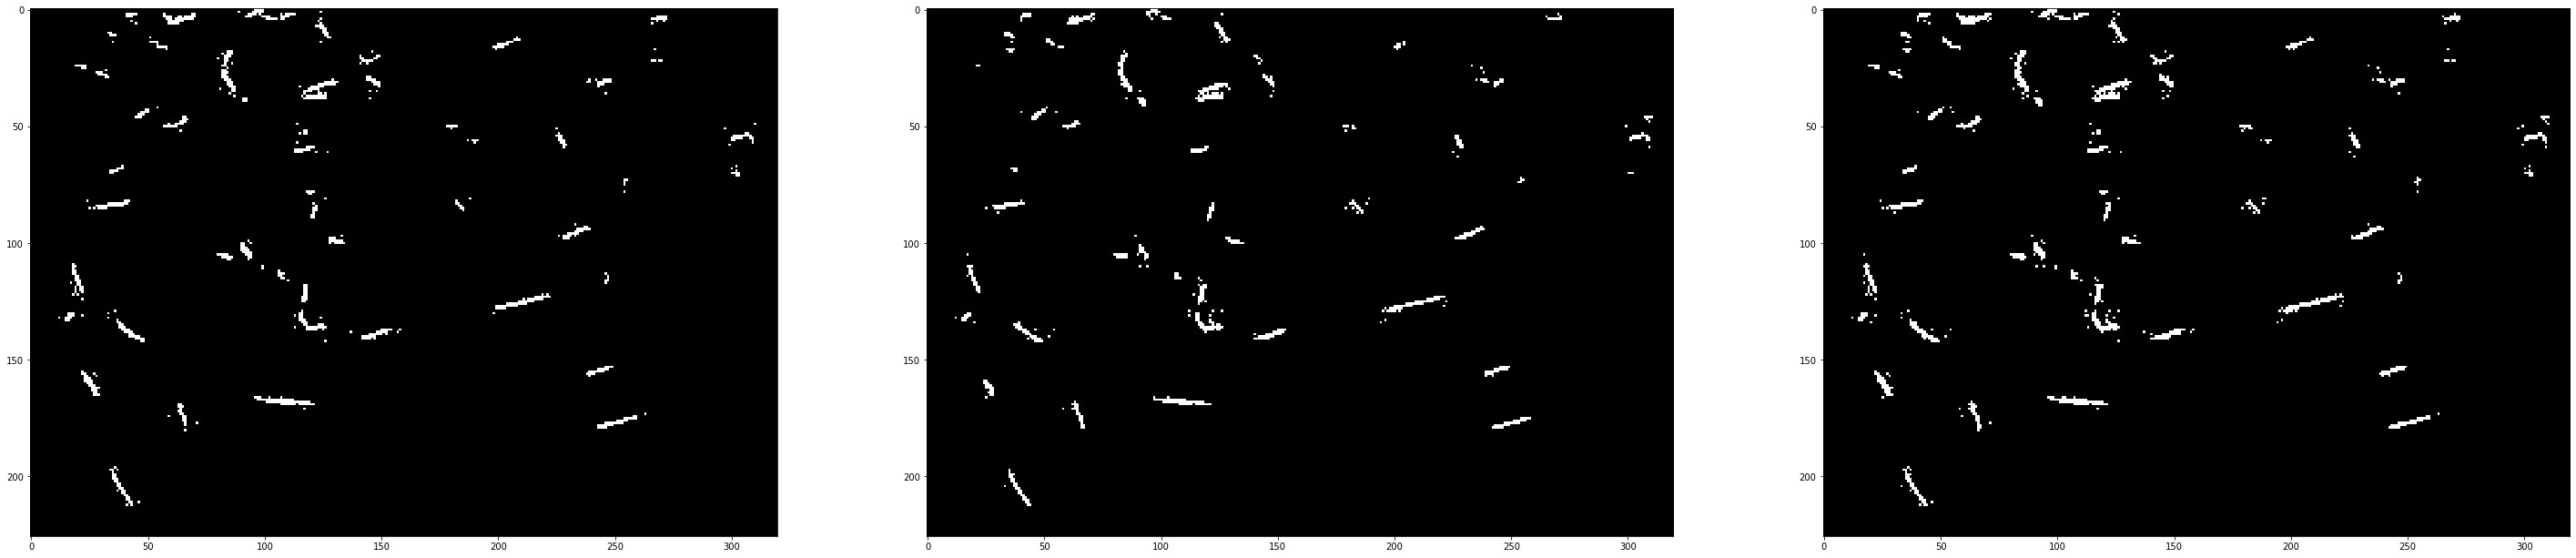

In [234]:
# Display images
# im2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

images = [im1_b, im2_b, combined_image_b]

plt.figure(figsize=(50,50))
columns = 3
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(image, cmap = 'gray')

In [235]:
# cv2.imwrite("imageONE.jpg", im1_b)
# cv2.imwrite("imageTWO.jpg", im2_b)
# cv2.imwrite("imageCOMBINED.jpg", combined_image)

#### Find contours and measure the difference

In [236]:
# find contour coordinates

im1_COORDINATES = find_contours(filename1, im1_b, im1_gray)
combined_image_CDNTS = find_contours("c", combined_image_b, combined_image_g)

Tips(TOTAL): 176
Tips(RADIUS BIGGER THAN 10mm): 18
Tips(TOTAL): 93
Tips(RADIUS BIGGER THAN 10mm): 19


In [237]:
# Create dataframes with root tips for image #1 and combined image

image1 = pd.DataFrame.from_dict(im1_COORDINATES, orient='index', columns=['Image','(X,Y) coordinates', 'Radius','Diameter'])
image_combined = pd.DataFrame.from_dict(combined_image_CDNTS, orient='index', columns=['Image','(X,Y) coordinates', 'Radius','Diameter'])

In [238]:
image1

,Image,"(X,Y) coordinates",Radius,Diameter
0,1.jpeg,"(17, 119)",16,32
1,1.jpeg,"(27, 26)",11,22
2,1.jpeg,"(35, 84)",11,22
3,1.jpeg,"(39, 202)",12,24
4,1.jpeg,"(43, 136)",12,24
5,1.jpeg,"(91, 107)",11,22
6,1.jpeg,"(87, 27)",13,26
7,1.jpeg,"(110, 6)",23,46
8,1.jpeg,"(111, 166)",16,32
9,1.jpeg,"(120, 127)",16,32


In [239]:
image_combined

,Image,"(X,Y) coordinates",Radius,Diameter
0,c,"(17, 119)",16,32
1,c,"(31, 15)",21,42
2,c,"(35, 83)",12,24
3,c,"(40, 203)",13,26
4,c,"(43, 135)",13,26
5,c,"(91, 107)",11,22
6,c,"(86, 31)",16,32
7,c,"(119, 19)",37,74
8,c,"(111, 168)",16,32
9,c,"(115, 127)",19,38


In [240]:
# Auxiliary functions

def check_Radius(r_1, r_2):
    diff = r_2-r_1
    if diff >= 0:
        print('Radius #1 <= Radius #2')
        return True
    else:
        return False

# check_distance() function to calculate distance between two points    
def check_distance(crd1, crd2):
    distance = math.sqrt(((crd1[0]-crd2[0])**2)+((crd1[1]-crd2[1])**2))
    if distance < 30:
        print(f"Distance between points: {distance} --> same root")
        return True
    else:
        print(f"Distance between points: {distance} --> different root")
        return False

# get dataframe coordinates and radius (IMAGE #1)
def extract_data_DF(df):
    return (df[1], df[2])

# get image coordinates from dictionary (IMAGE #2)
def extract_crd_DICT(nbr, dct):
    return dct[nbr][1]

# draw only one circle
def draw_circles_around_ONE(image, coordinates, color):
    cv2.circle(image, (coordinates[1][0], coordinates[1][1]), coordinates[2], color, 2)
    cv2.circle(image, (coordinates[1][0], coordinates[1][1]), 0, color, 5)
        
def add_Text_ONE(image, coordinates, idRoot):
    cv2.putText(image, "#{}".format(idRoot), (coordinates[1][0]+50, coordinates[1][1]-35), cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(0, 255, 0), thickness=2)
    
def compareTips(im1_crd, im2_crd, im1_r, im2_r, im1_id, image, image1, image2):
    # Check if radius is bigger or not and get differentce (= root growing change)
    # if status is True --> same root by radious
    if check_Radius(im1_r, im2_r) and check_distance(im1_crd, im2_crd):
        print("---> TRUE")
        image.loc[im1_id,'Root #ID'] = im1_id
        image.loc[im1_id,'Tip lenght #1'] = im1_r*2
        image.loc[im1_id,'Tip length #2'] = im2_r*2
        image.loc[im1_id,'Difference, mm'] = (im2_r-im1_r)*2
    else:
        print('False')

In [241]:
# Create empty dataframe for further filling

result_DF = pd.DataFrame(columns=['Root #ID', 'Tip lenght #1', 'Tip length #2', 'Difference, mm'])

In [242]:
result_DF

,Root #ID,Tip lenght #1,Tip length #2,"Difference, mm"


In [243]:
# Compare root tips and find same roots in image #1 and combined image

for i in range(len(combined_image_CDNTS)):
    im2_id = i
    im2_crd = combined_image_CDNTS[i][1]
    im2_r = combined_image_CDNTS[i][2]
    print(f'Combined image: ID {im2_id}, coordinates {im2_crd} and radius {im2_r}')
    for j in range(image1.shape[0]): 
        # imX_id is root number, imX_crd are root coordinations and imX_r is root radius
        (im1_crd,im1_r) = extract_data_DF(image1.iloc[j,:])
        im1_id = j
        print(f'Image #1: ID {im1_id}, coordinates {im1_crd} and radius {im1_r}')
        print(f'Next step: Compare image#1 ID {im1_id}, coordinates {im1_crd} and radius {im1_r} with combined image ID {im2_id}, coordinates {im2_crd} and radius {im2_r}')
        compareTips(im1_crd, im2_crd, im1_r, im2_r, im1_id, result_DF, image1, image_combined)
    print("-----------------------------------------------------------------------------------------------------------------------------")

Combined image: ID 0, coordinates (17, 119) and radius 16
Image #1: ID 0, coordinates (17, 119) and radius 16
Next step: Compare image#1 ID 0, coordinates (17, 119) and radius 16 with combined image ID 0, coordinates (17, 119) and radius 16
Radius #1 <= Radius #2
Distance between points: 0.0 --> same root
---> TRUE
Image #1: ID 1, coordinates (27, 26) and radius 11
Next step: Compare image#1 ID 1, coordinates (27, 26) and radius 11 with combined image ID 0, coordinates (17, 119) and radius 16
Radius #1 <= Radius #2
Distance between points: 93.53608929178085 --> different root
False
Image #1: ID 2, coordinates (35, 84) and radius 11
Next step: Compare image#1 ID 2, coordinates (35, 84) and radius 11 with combined image ID 0, coordinates (17, 119) and radius 16
Radius #1 <= Radius #2
Distance between points: 39.35733730830886 --> different root
False
Image #1: ID 3, coordinates (39, 202) and radius 12
Next step: Compare image#1 ID 3, coordinates (39, 202) and radius 12 with combined imag

In [244]:
result_DF.index = pd.RangeIndex(len(result_DF.index))
result_DF.index = range(len(result_DF.index))
result_DF['Root #ID'] = result_DF['Root #ID'].astype(int)

In [245]:
result_DF

,Root #ID,Tip lenght #1,Tip length #2,"Difference, mm"
0,0,32.0,32.0,0.0
1,1,22.0,42.0,20.0
2,2,22.0,24.0,2.0
3,3,24.0,26.0,2.0
4,4,24.0,26.0,2.0
5,5,22.0,22.0,0.0
6,6,26.0,32.0,6.0
7,7,46.0,74.0,28.0
8,10,22.0,26.0,4.0
9,12,26.0,26.0,0.0


### READ CVS-FILE AND IMAGE #2 (OPTION 2)

In [246]:
# read csv-file with previoud day information and compare to combined image

csv_file = open_file()
df = pd.read_csv(csv_file[0], sep=';', usecols=['Image', '(X,Y) coordinates', 'Radius', 'Diameter'])

In [247]:
df

,Image,"(X,Y) coordinates",Radius,Diameter
0,1.jpeg,"(17, 119)",16,32
1,1.jpeg,"(27, 26)",11,22
2,1.jpeg,"(35, 84)",11,22
3,1.jpeg,"(39, 202)",12,24
4,1.jpeg,"(43, 136)",12,24
5,1.jpeg,"(91, 107)",11,22
6,1.jpeg,"(87, 27)",13,26
7,1.jpeg,"(110, 6)",23,46
8,1.jpeg,"(111, 166)",16,32
9,1.jpeg,"(120, 127)",16,32


In [248]:
# read image

filename2 = open_file()
# filenameOriginal2 = open_file()

In [249]:
im2_b, im2_gray = process_image(filename2)

In [250]:
im2_COORDINATES = find_contours(filename2, im2_b, im2_gray)
image2 = pd.DataFrame.from_dict(im2_COORDINATES, orient='index', columns=['Image','(X,Y) coordinates', 'Radius','Lenght change'])

Tips(TOTAL): 164
Tips(RADIUS BIGGER THAN 10mm): 14


In [251]:
# Create empty dataframe for further filling

result_DF = pd.DataFrame(columns=['Root #ID', 'Tip lenght #1', 'Tip length #2', 'Difference, mm'])


In [252]:
image2

,Image,"(X,Y) coordinates",Radius,Lenght change
0,2.jpg,"(16, 119)",16,32
1,2.jpg,"(35, 83)",11,22
2,2.jpg,"(40, 203)",13,26
3,2.jpg,"(86, 31)",16,32
4,2.jpg,"(100, 5)",11,22
5,2.jpg,"(111, 168)",16,32
6,2.jpg,"(115, 127)",19,38
7,2.jpg,"(128, 91)",12,24
8,2.jpg,"(147, 139)",11,22
9,2.jpg,"(143, 27)",13,26


In [253]:
# Compare root tips and find same roots in image #1 and combined image

for i in range(len(im2_COORDINATES)):
    im2_id = i
    im2_crd = im2_COORDINATES[i][1]
    im2_r = im2_COORDINATES[i][2]
    print(f'Combined image: ID {im2_id}, coordinates {im2_crd} and radius {im2_r}')
    for j in range(image1.shape[0]): 
        # imX_id is root number, imX_crd are root coordinations and imX_r is root radius
        (im1_crd,im1_r) = extract_data_DF(df.iloc[j,:])
        im1_id = j
        print(f'Image #1: ID {im1_id}, coordinates {im1_crd} and radius {im1_r}')
        print(f'Next step: Compare image#1 ID {im1_id}, coordinates {im1_crd} and radius {im1_r} with combined image ID {im2_id}, coordinates {im2_crd} and radius {im2_r}')
        compareTips(eval(im1_crd), im2_crd, im1_r, im2_r, im1_id, result_DF, df, image2)
    print("-----------------------------------------------------------------------------------------------------------------------------")

Combined image: ID 0, coordinates (16, 119) and radius 16
Image #1: ID 0, coordinates (17, 119) and radius 16
Next step: Compare image#1 ID 0, coordinates (17, 119) and radius 16 with combined image ID 0, coordinates (16, 119) and radius 16
Radius #1 <= Radius #2
Distance between points: 1.0 --> same root
---> TRUE
Image #1: ID 1, coordinates (27, 26) and radius 11
Next step: Compare image#1 ID 1, coordinates (27, 26) and radius 11 with combined image ID 0, coordinates (16, 119) and radius 16
Radius #1 <= Radius #2
Distance between points: 93.64827814754524 --> different root
False
Image #1: ID 2, coordinates (35, 84) and radius 11
Next step: Compare image#1 ID 2, coordinates (35, 84) and radius 11 with combined image ID 0, coordinates (16, 119) and radius 16
Radius #1 <= Radius #2
Distance between points: 39.824615503479755 --> different root
False
Image #1: ID 3, coordinates (39, 202) and radius 12
Next step: Compare image#1 ID 3, coordinates (39, 202) and radius 12 with combined ima

In [254]:
result_DF.index = pd.RangeIndex(len(result_DF.index))
result_DF.index = range(len(result_DF.index))
result_DF['Root #ID'] = result_DF['Root #ID'].astype(int)
result_DF

,Root #ID,Tip lenght #1,Tip length #2,"Difference, mm"
0,0,32.0,32.0,0.0
1,2,22.0,22.0,0.0
2,3,24.0,26.0,2.0
3,6,26.0,32.0,6.0
4,8,32.0,32.0,0.0
5,9,32.0,38.0,6.0
6,11,22.0,22.0,0.0
7,10,22.0,26.0,4.0
8,12,26.0,26.0,0.0
9,13,34.0,34.0,0.0
